<!-- Badges: -->

<!-- Title: -->
<div align="center">
  <h1><b> Gate Decomposition </b></h1>
  <h2> Crash Course - Quantum Circuit Theory </h2>
</div>
<br>

<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

<div align='center'>
<table class="tfo-notebook-buttons" align="head">
  <td>
    <a target="_blank" href="https://github.com/QuCAI-Lab/quantum-circuit-theory"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
</table>
</div>

In [1]:
%run 11_implementations.ipynb

Author: Lucas Camponogara Viera

Github username: camponogaraviera

Website: https://qucai-lab.github.io/

Last updated: 2023-06-08

Python implementation: CPython
Python version       : 3.11.2
IPython version      : 8.14.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.19.0-43-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Git repo: https://github.com/QuCAI-Lab/quantum-circuit-theory.git

Git branch: dev

IPython   : 8.14.0
scipy     : 1.9.3
pennylane : 0.28.0
matplotlib: 3.6.2
watermark : 2.3.1
pylatexenc: 2.10
sympy     : 1.11.1
numpy     : 1.23.5

Watermark: 2.3.1

{'commit_hash': 'f11276427',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': '/home/lucas/anaconda3/envs/qct/lib/python3.11/site-packages/IPython',
 'ipython_version': '8.14.0',
 'os_name': 'posix',
 'platform': 'Linux-5.19.0-43-generic-x86_64-with-glibc2.35',
 'sys_executable': '/home/lucas/anaconda3/envs/qct/bin/python',
 'sys_platf

# Table of Contents

- Pauli decomposition. 
- Single-qubit gate decomposition.
- Two-qubit gate decomposition.

# [Pauli decomposition](https://learn.qiskit.org/course/ch-gates/proving-universality#pauli)

Since measurements in the quantum computer are performed in the computational basis a.k.a Pauli-Z basis, when the quantum observable $\hat{\mathcal{O}}$ is not diagonalized in the computational basis, a change of basis circuit is necessary to rotate from the eigenbasis of the observable into the computational basis:

$$\langle \psi| \hat{\mathcal{O}} |\psi\rangle = \langle 0^{\otimes n}|\hat{U}^{\dagger}W^{\dagger} \hat{\mathcal{O}} W\hat{U}|0^{\otimes n}\rangle \in \mathbb{R},$$

where $W$ denotes the change of basis circuit.

However, finding the change of basis circuit for a general observable is not a trivial task. Therefore, it is useful to write the Hermitian observable into the Pauli basis, i.e, decompose it into a sum of Pauli observables:

$$\hat{\mathcal{O}} = \sum_{j=1}^{d=2^n} c_j P_j, \ \ \ P_j \in \{I, X, Y, Z\}^{\otimes n}.$$


With that, the new measurement becomes

$$\langle \psi| \hat{\mathcal{O}} |\psi\rangle =\langle \psi| \Big(\sum_{j=1}^{d=2^n} c_j P_j \Big) |\psi\rangle= \sum_{j=1}^{d=2^n} c_j \langle \psi | P_j | \psi \rangle \in \mathbb{R}.$$

# Single-qubit gate decomposition

## Z-Y Decomposition

See Theorem 4.1 of [Ref. [1]](#) on page 175 for a Proof.

Z-Y Decomposition for a single-qubit Unitary gate $U$:

\begin{equation}
U = e^{i\alpha}R_z(\beta)R_y(\gamma)R_z(\delta).
\end{equation}

Where $\alpha$, $\beta$, $\gamma$ and $\delta$ are real-valued numbers.

## X-Y Decomposition

See Exercise 4.10 of [Ref. [1]](#) on page 176.

X-Y Decomposition for a single-qubit Unitary gate $U$:

\begin{eqnarray}
U = e^{i\alpha} R_x(\beta)R_y(\gamma)R_x(\delta).
\end{eqnarray}

Where $\alpha$, $\beta$, $\gamma$ and $\delta$ are real-valued numbers.

## ABC Decomposition

See Corollary 4.2 of [Ref. [1]](#) on page 176, or [Barenco et al.](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.3457) Lemma 4.3 for a Proof.

A Unitary gate U acting on a single qubit can always be decomposed into:

\begin{equation}
U = e^{i\alpha}AXBXC,
\end{equation}

where $\alpha$ is a overall phase factor and $ABC=I$ for unitary operators $A$, $B$, and $C \in SU(2)$ acting on a single qubit.

## V-Z Decomposition

\begin{equation}
U = e^{i\alpha}R_z(\beta)V^{\dagger}R_z(\gamma)VR_z(\delta).
\end{equation}

Where:

- $V=X^{1/2}$ is the square root of $X$.
- $C = S^{\dagger}$.
- $R_z(\theta)=V^{\dagger}R_y(\theta)V$.

# Two-qubit gate decomposition


See [Barenco et al.](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.3457) Lemma 5.1 on page 10 for a Proof.

A Control-U gate can be decomposed into a CNOT, $A \in SU(2)$, $B\in SU(2)$, and $C\in SU(2)$ gates, as follows:


\begin{equation}
C(U) = \Phi_1(\theta)A_2C(X)B_2C(X)C_2 \in SU(2),
\end{equation}
where
\begin{equation}
\Phi_1 = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{pmatrix} \otimes I_{2x2},
\end{equation}

is a phase gate applied to the first qubit. And $A_2$, $B_2$ and $C_2$ are gates applied to the second qubit.

# CCCU gate

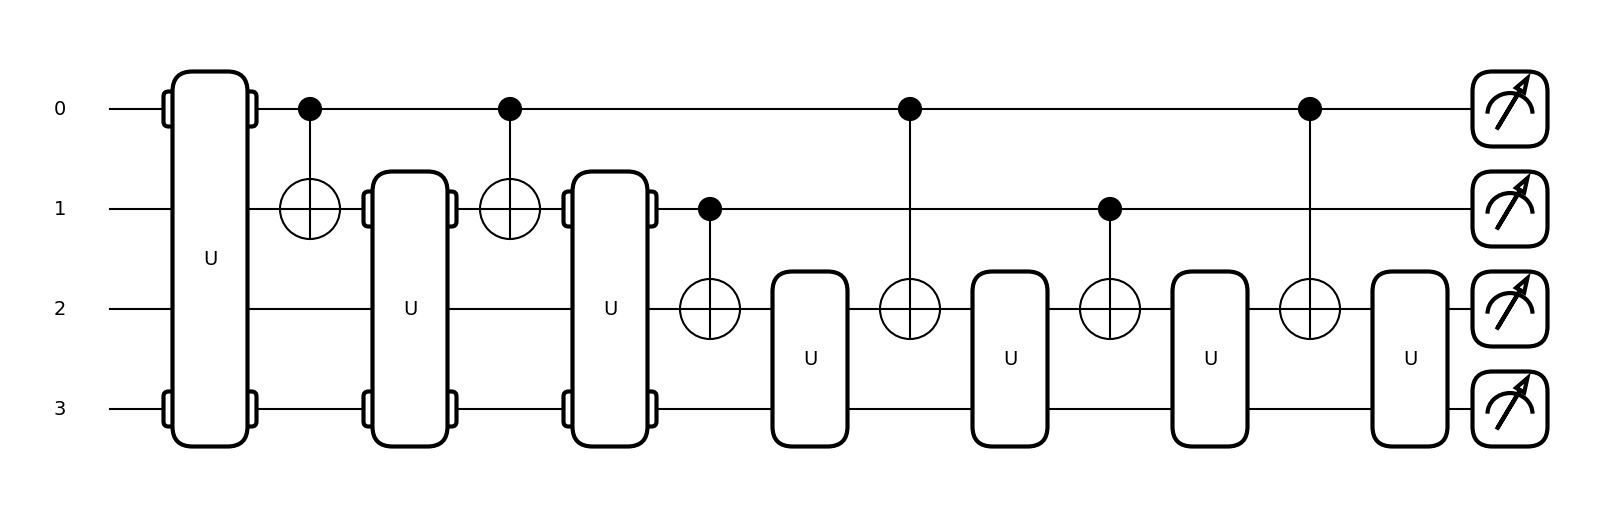

In [3]:
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def my_ansatz(gate, gate_dagger, **kwargs):
  '''
  This function performs the decomposition of a MultiControlled CCCU gate according to Barenco et al., 1995, pg. 17.
  '''
  qml.QubitUnitary(gate, wires=[0, 3])
  qml.CNOT(wires=[0,1])
  qml.QubitUnitary(gate_dagger, wires=[1, 3]) #adjunt
  qml.CNOT(wires=[0,1])
  qml.QubitUnitary(gate, wires=[1, 3])
  qml.CNOT(wires=[1,2])
  qml.QubitUnitary(gate_dagger, wires=[2, 3]) #adjunt
  qml.CNOT(wires=[0,2])
  qml.QubitUnitary(gate, wires=[2, 3])
  qml.CNOT(wires=[1,2])
  qml.QubitUnitary(gate_dagger, wires=[2, 3]) #adjunt
  qml.CNOT(wires=[0,2])
  qml.QubitUnitary(gate, wires=[2, 3])
  return qml.probs(wires=[0,1,2,3])

X = np.array([[0, 1], [1, 0]])
X_tensor_X = np.kron(X, X)

fig, ax = qml.draw_mpl(my_ansatz, decimals=6)(X_tensor_X, np.conjugate(X_tensor_X))

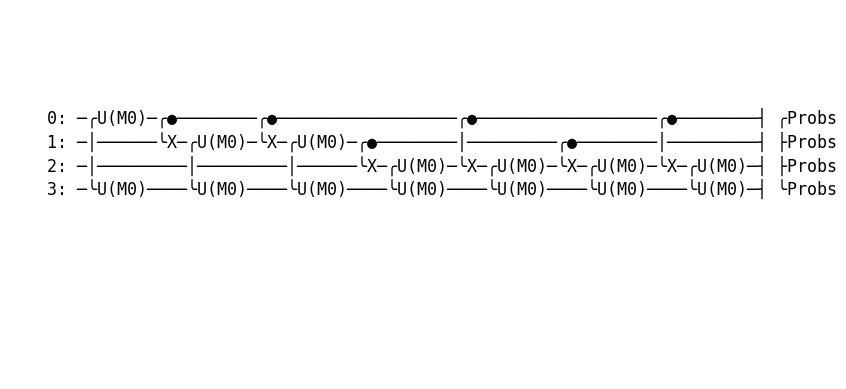

In [4]:
# Draw and display the circuit using Matplotlib
circuit = qml.draw(my_ansatz)(X_tensor_X, np.conjugate(X_tensor_X), show_variable_names=False)
fig, ax = plt.subplots()
ax.axis('off')
ax.set_aspect('equal')
ax.text(0.1, 0.5, circuit, fontsize=12, family='monospace')
plt.show()

# Exercises

Exercise 4.11 of [Ref. [1]](#) on page 176.

---
**Exercise 4.11:** Suppose $\hat{m}$ and $\hat{n}$ are non-parallel real unit vectors in three dimensions. Use Theorem 4.1 to show that an arbitrary single qubit unitary U may be written

$$U=e^{i\alpha} R_{\hat{n}}(\beta)R_{\hat{m}}(\gamma)R_{\hat{n}}(\delta).$$

for appropriate choices of $\alpha$, $\beta$, $\gamma$ and $\delta$.

---

# References &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> 


\[1] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: [Cambridge Univ. Press.](https://doi.org/10.1017/CBO9780511976667) 10th Anniv. Ed. 
- Chapter 4.

\[2] Barenco, A., Bennett, C.H., Cleve, R., DiVincenzo, D.P., Margolus, N., Shor, P., Sleator, T., Smolin, J.A. and Weinfurter, H. (1995) Elementary gates for quantum computation. [Phys. Rev. A 52, 3457–3467](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.3457).
